In [ ]:
Create an “Academic performance” dataset of students and perform the following operations using Python.

Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [15]:
#importing python libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data from the CSV file

data = pd.read_csv('data.csv')

In [3]:
data.head()

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.92,5.06,19
1,827,Seema,Singh,919085484267,0.22,2.83,20
2,566,Pooja,Rao,919692747629,4.00,5.78,20
3,431,Vikram,Trivedi,919289900918,3.93,NaN,20
4,688,Rishi,Nair,918510327681,0.34,3.35,22


In [ ]:
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [5]:
# Check for missing values

data.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            5
CGPA2            3
age              0
dtype: int64

In [6]:
#Check for inconsistents

data.describe()

,Roll Number,Mobile Number,CGPA1,CGPA2,age
count,50.000000,5.000000e+01,45.000000,47.000000,50.000000
mean,492.440000,9.185083e+11,5.092444,4.586170,22.780000
std,250.705792,9.131771e+08,3.068496,2.688698,22.994489
min,15.000000,9.170212e+11,0.000000,0.250000,2.000000
25%,288.000000,9.176502e+11,2.920000,2.730000,18.000000
50%,527.500000,9.186161e+11,4.750000,4.080000,19.500000
75%,659.000000,9.192426e+11,8.110000,6.580000,22.750000
max,994.000000,9.199546e+11,9.920000,9.720000,180.000000


In [7]:
# fill missing values with the mean of the column on CGPA1 and CGPA2

data['CGPA1'] = data['CGPA1'].fillna(data['CGPA1'].mean())
data['CGPA2'] = data['CGPA2'].fillna(data['CGPA2'].mean())

In [ ]:
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

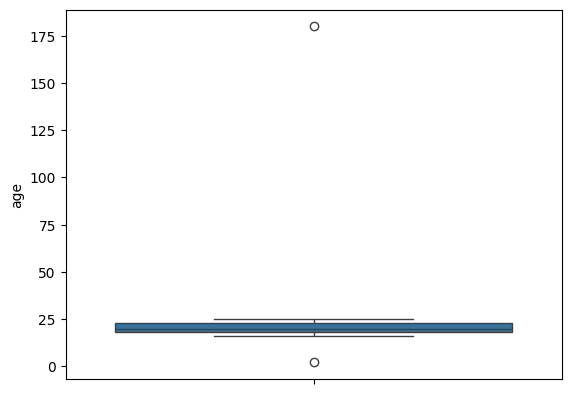

In [8]:
# Check for outliers

sns.boxplot(data['age'])
plt.show()

In [9]:
# look for outliers in the age column

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  18.0
Q3:  22.75
IQR:  4.75


In [10]:
# print the number of outliers

outliers = data[(data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))]
print(outliers)

    Roll Number First Name Last Name  Mobile Number  CGPA1  CGPA2  age
6           532  Vaishnavi       Jha   919009969408   5.63   4.38    2
27          722  Vaishnavi     Patel   917550452611   9.49   3.29  180


In [11]:
# replace outliers with the mode

data['age'] = data['age'].mask(data['age'] > Q3 + 1.5 * IQR, data['age'].mode()[0])
data['age'] = data['age'].mask(data['age'] < Q1 - 1.5 * IQR, data['age'].mode()[0])

print(data['age'])

0     19
1     20
2     20
3     20
4     22
5     19
6     16
7     23
8     18
9     24
10    17
11    16
12    19
13    22
14    23
15    21
16    16
17    25
18    16
19    24
20    19
21    18
22    18
23    23
24    22
25    23
26    20
27    16
28    24
29    16
30    23
31    24
32    23
33    18
34    16
35    18
36    16
37    22
38    22
39    19
40    23
41    19
42    22
43    16
44    17
45    22
46    19
47    16
48    16
49    19
Name: age, dtype: int64


In [ ]:
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.Reason and document your approach properly.The age column has a centered data. We can apply a log transformation to the age column to convert the distribution into a normal distribution.

In [18]:
# log transformation

data['age'] = data['age'].apply(lambda x: np.log(x) if x > 0 else 0)

# display the transformed data

print(data['age'])

0     0.076885
1     0.092751
2     0.092751
3     0.092751
4     0.120897
5     0.076885
6     0.019588
7     0.133470
8     0.059575
9     0.145198
10    0.040577
11    0.019588
12    0.076885
13    0.120897
14    0.133470
15    0.107368
16    0.019588
17    0.156176
18    0.019588
19    0.145198
20    0.076885
21    0.059575
22    0.059575
23    0.133470
24    0.120897
25    0.133470
26    0.092751
27    0.019588
28    0.145198
29    0.019588
30    0.133470
31    0.145198
32    0.133470
33    0.059575
34    0.019588
35    0.059575
36    0.019588
37    0.120897
38    0.120897
39    0.076885
40    0.133470
41    0.076885
42    0.120897
43    0.019588
44    0.040577
45    0.120897
46    0.076885
47    0.019588
48    0.019588
49    0.076885
Name: age, dtype: float64


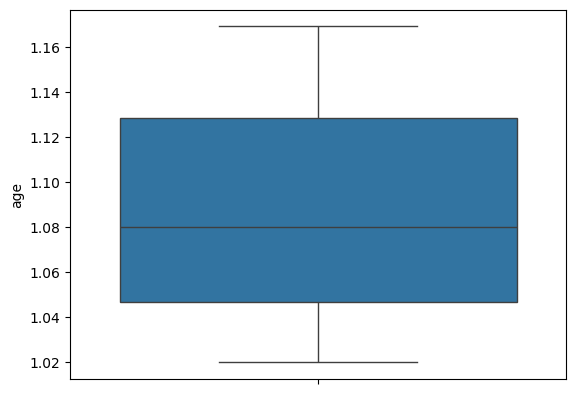

In [17]:
 #show age distribution after transformation in boxplot

sns.boxplot(data['age'])
plt.show()